In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

In [2]:
def financial_data(ticker):
    url_income_statement = 'https://www.alphavantage.co/query?function=INCOME_STATEMENT'
    url_balance_sheet = 'https://www.alphavantage.co/query?function=BALANCE_SHEET'
    url_cash_flow = 'https://www.alphavantage.co/query?function=CASH_FLOW'
    p = {
        'symbol': ticker,
        'apikey': '3WZH46PUYUQ32UBX'
    }
    income_statement = requests.get(url_income_statement, params=p)
    balance_sheet = requests.get(url_balance_sheet, params=p)
    cash_flow = requests.get(url_cash_flow, params=p)
    
    js_income_statement = income_statement.json()['quarterlyReports']
    js_balance_sheet = balance_sheet.json()['quarterlyReports']
    js_cash_flow = cash_flow.json()['quarterlyReports']

    df_income_statement = pd.DataFrame(js_income_statement)
    df_balance_sheet = pd.DataFrame(js_balance_sheet)
    df_cash_flow = pd.DataFrame(js_cash_flow)

    df_financial_data = pd.concat([df_income_statement, df_balance_sheet, df_cash_flow], axis=1)

    return df_financial_data

data = financial_data('AAPL')

In [3]:
cols = ['fiscalDateEnding', 'totalRevenue', 'grossProfit', 'netIncome', 'retainedEarnings', 'totalShareholderEquity', 'longTermDebt', 'capitalExpenditures', 'dividendPayout', 'paymentsForRepurchaseOfEquity']

data = data.loc[:, cols]
data = data.T.drop_duplicates().T
data['fiscalDateEnding'] = pd.to_datetime(data['fiscalDateEnding'], format='%Y/%m/%d')
data.set_index('fiscalDateEnding', inplace=True)
data.sort_index(ascending=True, inplace=True)
data = data.replace('None', 0)
data = data.astype(int)
data

,totalRevenue,grossProfit,netIncome,retainedEarnings,totalShareholderEquity,longTermDebt,capitalExpenditures,dividendPayout,paymentsForRepurchaseOfEquity
fiscalDateEnding,,,,,,,,,
2018-03-31,61137000000,23422000000,13822000000,91898000000,126878000000,119598000000,4041000000,3190000000,22756000000
2018-06-30,53265000000,20421000000,11519000000,79436000000,114949000000,108598000000,3267000000,3653000000,20783000000
2018-09-30,62900000000,24084000000,14125000000,70400000000,107147000000,111984000000,3041000000,3530000000,19104000000
2018-12-31,83420000000,32031000000,19965000000,80510000000,117892000000,112372000000,3355000000,3568000000,8796000000
2019-03-31,57005000000,21821000000,11561000000,64558000000,105860000000,113805000000,2363000000,3443000000,23702000000
2019-06-30,52943000000,20227000000,10044000000,53724000000,96456000000,116029000000,2000000000,3629000000,16955000000
2019-09-30,64040000000,24313000000,13686000000,45898000000,90488000000,117760000000,2777000000,3479000000,17444000000
2019-12-31,91034000000,35217000000,22236000000,43977000000,89531000000,119324000000,2107000000,3539000000,20706000000
2020-03-31,57556000000,22370000000,11249000000,33182000000,78425000000,115992000000,1853000000,3375000000,18574000000


In [4]:
data['gross_margin (%)'] = round((data['grossProfit'] / data['totalRevenue']) * 100, 2)
data['net_margin (%)'] = round((data['netIncome'] / data['totalRevenue']) * 100, 2)
data['return_on_equity (%)'] = round((data['netIncome'] / data['totalShareholderEquity']) * 100, 2)
data['years_to_pay_off_long_term_debt'] = round((data['longTermDebt'] / data['netIncome']) * 100, 2)
data['capital_expenditures / net_income (%)'] = round((data['capitalExpenditures'] / data['netIncome']) * 100, 2)
data['augmented_pay_out_ratio (%)'] = round(((data['dividendPayout'] + data['paymentsForRepurchaseOfEquity']) / data['netIncome']) * 100, 2)
data = data.iloc[:, 9:]
data

,gross_margin (%),net_margin (%),return_on_equity (%),years_to_pay_off_long_term_debt,capital_expenditures / net_income (%),augmented_pay_out_ratio (%)
fiscalDateEnding,,,,,,
2018-03-31,38.31,22.61,10.89,865.27,29.24,187.72
2018-06-30,38.34,21.63,10.02,942.77,28.36,212.14
2018-09-30,38.29,22.46,13.18,792.81,21.53,160.24
2018-12-31,38.40,23.93,16.93,562.84,16.80,61.93
2019-03-31,38.28,20.28,10.92,984.39,20.44,234.80
2019-06-30,38.21,18.97,10.41,1155.21,19.91,204.94
2019-09-30,37.97,21.37,15.12,860.44,20.29,152.88
2019-12-31,38.69,24.43,24.84,536.63,9.48,109.03
2020-03-31,38.87,19.54,14.34,1031.13,16.47,195.12


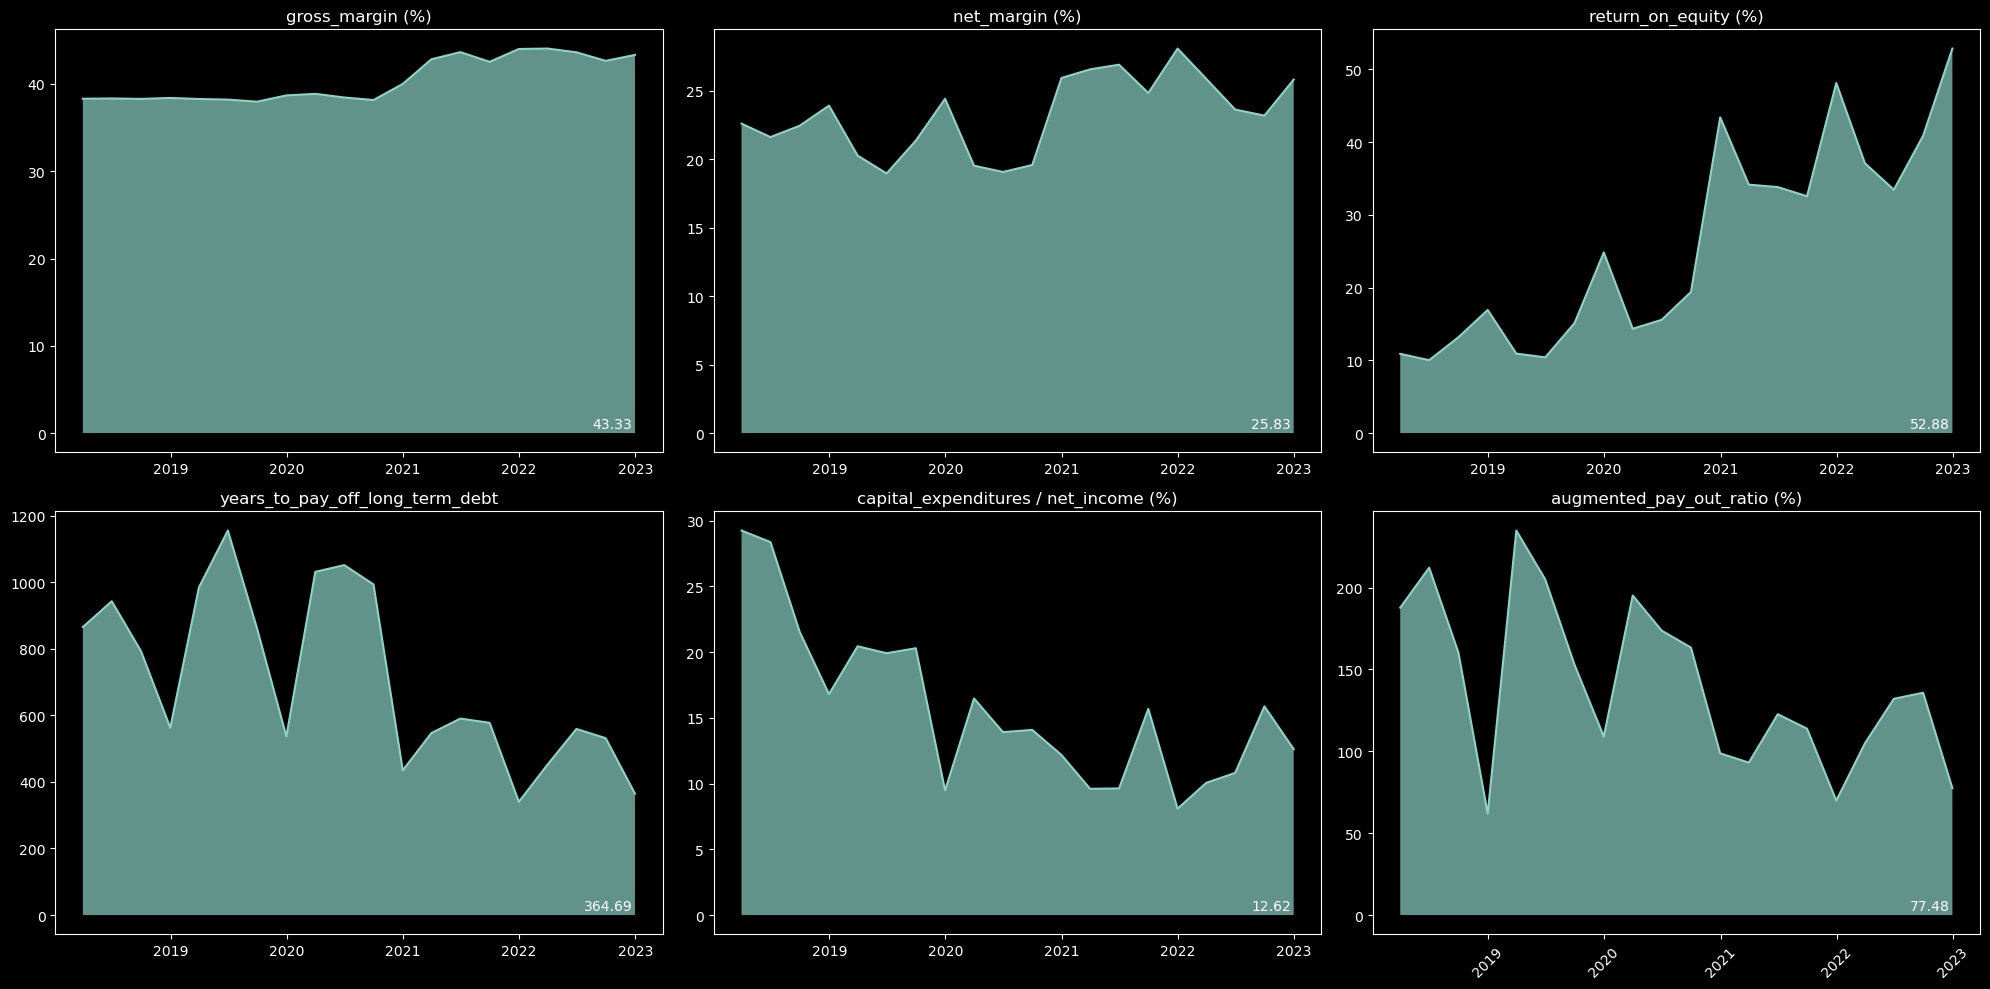

In [7]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(20, 10), nrows=2, ncols=3)
cols = data.columns
for i, ax in enumerate(ax.flatten()):
    if i < len(cols):
        ax.plot(data[cols[i]])
        ax.fill_between(data.index, data[cols[i]], alpha=0.7)
        ax.set_title(cols[i])
        ax.text(0.95, 0.05, f"{data[cols[i]].iloc[-1]:.2f}", transform=ax.transAxes, horizontalalignment='right', verticalalignment='bottom')
        plt.xticks(rotation=45)
    else:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()